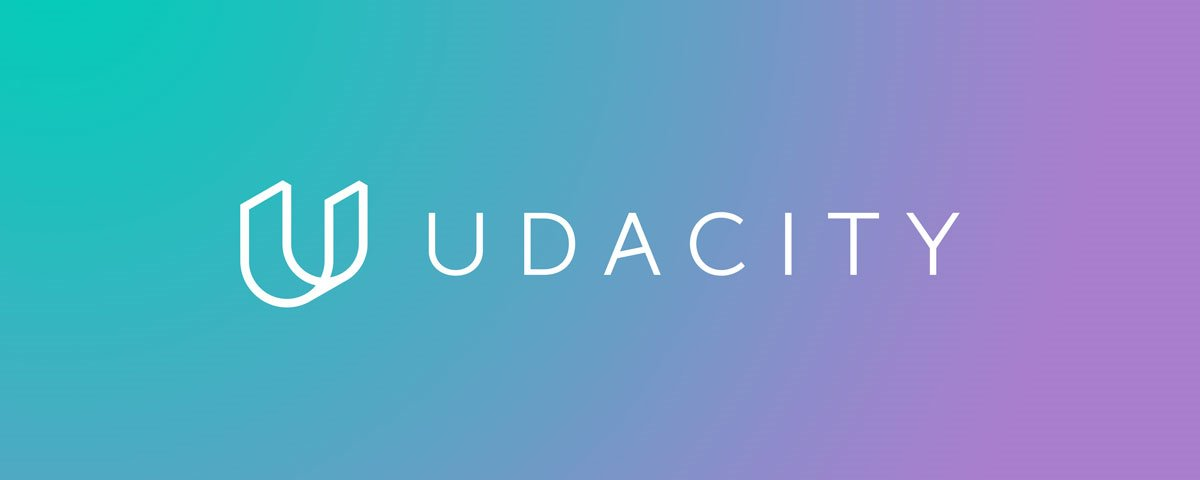

# Fundamentos de AI & Machine Learning

## Introdução a Machine Learning

1. <a href='#projeto_titanic'>Projeto: Exploração de sobrevivência no Titanic</a>;
2. <a href='#projeto_boston'>Projeto: Estimando Preços dos Imóveis de Boston</a>;

<a id='projeto_titanic'></a>
## Projeto: Exploração de sobrevivência no Titanic

***Dados sobre compartilhamento de bicicletas***  

*Em 1912, o navio RMS Titanic atingiu um iceberg em sua viagem inaugural e afundou, resultando na morte da maioria de seus passageiros e tripulantes. Neste projeto introdutório, exploraremos um subconjunto do manifesto de passageiros do RMS Titanic para determinar quais recursos melhor prevêem se alguém sobreviveu ou não sobreviveu. Para concluir este projeto, você precisará implementar várias previsões condicionais e responder às perguntas abaixo. A submissão do seu projeto será avaliada com base na conclusão do código e suas respostas às perguntas*

*Para começar a trabalhar com os dados do passageiro do RMS Titanic, primeiro precisaremos 'importar' a funcionalidade de que precisamos e carregar nossos dados em um DataFrame `pandas`.
Execute a célula de código abaixo para carregar nossos dados e exibir as primeiras entradas (passageiros) para exame usando a função `.head ()`.*

In [1]:
import numpy as np
import pandas as pd
import visuals as vs
from IPython.display import display

%matplotlib inline

in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

display(full_data.head())

/Users/taisfg/.pyenv/versions/3.4.0/lib/python3.4/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/taisfg/.pyenv/versions/3.4.0/lib/python3.4/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


*De uma amostra dos dados do RMS Titanic, podemos ver os vários recursos presentes para cada passageiro no navio:*
- ***Sobrevivido:*** *resultado de sobrevivência (0 = Não; 1 = Sim);*
- ***Pclass***: *classe socioeconômica (1 = classe alta; 2 = classe média; 3 = classe baixa);*
- ***Nome***: *nome do passageiro;*
- ***Sexo***: *sexo do passageiro;*
- ***Idade***: *idade do passageiro (algumas entradas contêm 'NaN');*
- ***SibSp***: *número de irmãos e cônjuges do passageiro a bordo;*
- ***Parch***: *número de pais e filhos do passageiro a bordo;*
- ***Ticket***: *número do bilhete do passageiro;*
- ***Tarifa***: *tarifa paga pelo passageiro;*
- ***Cabine***: *número da cabine do passageiro (algumas entradas contêm 'NaN');*
- ***Embarcado***: *porto de embarque do passageiro (C = Cherbourg; Q = Queenstown; S = Southampton).*

*Como estamos interessados no resultado da sobrevivência de cada passageiro ou membro da equipe, podemos remover o recurso **Sobrevivido** desse conjunto de dados e armazená-lo como sua própria variável separada 'resultados'. Usaremos esses resultados como nossos alvos de previsão.*


In [2]:
# Armazena em nova variável e remove do dataset
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


*A mesma amostra dos dados do RMS Titanic agora mostra o recurso **Sobrevivido** removido do DataFrame. Note que `data` (dados dos passageiros) e` outcomes` (os resultados da sobrevivência) estão agora emparelhados. Isso significa que para qualquer passageiro `data.loc [i]`, eles têm o resultado de sobrevivência `outcomes [i]`.*

*Para medir o desempenho de nossas previsões, precisamos de uma métrica para pontuar nossas previsões em relação aos verdadeiros resultados da sobrevivência. Já que estamos interessados em saber como nossas previsões são precisas, calcularemos a proporção de passageiros em que nossa previsão de sobrevivência está correta. Execute a célula de código abaixo para criar nossa função `accuracy_score` e testar uma previsão nos cinco primeiros passageiros.*

***Pense:*** *Dos cinco primeiros passageiros, se previrmos que todos sobreviveram, o que você esperaria que a precisão de nossas previsões fosse?*

In [3]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    
# Test the 'accuracy_score' function
predictions = pd.Series(np.ones(5, dtype = int))
print(accuracy_score(outcomes[:5], predictions))

Predictions have an accuracy of 60.00%.


*Se nos pedissem para fazer uma previsão sobre qualquer passageiro a bordo do RMS Titanic de quem não sabíamos nada, então a melhor previsão que poderíamos fazer seria que eles não sobrevivessem. Isso porque podemos supor que a maioria dos passageiros (mais de 50%) não sobreviveu ao naufrágio do navio. A função `predictions_0` abaixo sempre prevê que um passageiro não sobreviveu.*

In [4]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """

    predictions = []
    for _, passenger in data.iterrows():
        
        # Predict the survival of 'passenger'
        predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_0(data)

**Tarefa 1:** *Usando os dados do RMS Titanic, quão acurada seria a previsão de que nenhum dos passageiros sobreviveu?*

In [5]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 61.62%.


In [6]:
print("The accuracy that none of the passengers survived is 61.62%*")

The accuracy that none of the passengers survived is 61.62%*


*Vamos dar uma olhada se o recurso **Sex** tem alguma indicação de taxas de sobrevivência entre passageiros usando a função `survival_stats`. Esta função é definida no script Python `visuals.py` incluído neste projeto. Os dois primeiros parâmetros passados para a função são os dados do RMS Titanic e os resultados de sobrevivência dos passageiros, respectivamente. O terceiro parâmetro indica qual recurso queremos plotar estatísticas de sobrevivência.*

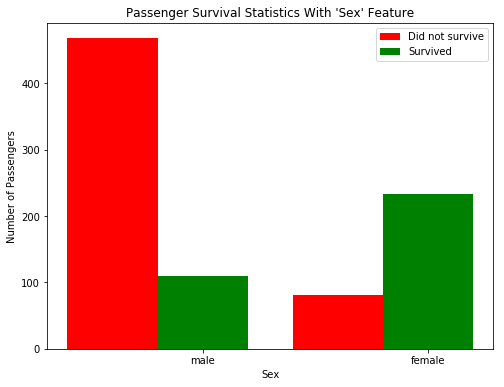

In [7]:
vs.survival_stats(data, outcomes, 'Sex')

*Examinando as estatísticas de sobrevivência, a grande maioria dos homens não sobreviveu ao naufrágio do navio. No entanto, a maioria das mulheres sobreviveu ao naufrágio do navio.*

**Tarefa 2:** *Vamos basear-se em nossa previsão anterior: se um passageiro era do sexo feminino, então vamos prever que eles sobreviveram. Caso contrário, vamos prever que o passageiro não sobreviveu. Preencha o código abaixo para que a função faça essa previsão e responda: quão precisa seria a previsão de que todas as passageiras do sexo feminino sobreviveram e os passageiros restantes não sobreviveram?*

***Dica:*** *Você pode acessar os valores de cada recurso para um passageiro como um dicionário. Por exemplo, `passageiro ['Sexo']` é o sexo do passageiro.*

In [8]:
def predictions_1(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        predictions.append(passenger['Sex'] == 'female')
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_1(data)

In [9]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 78.68%.


In [10]:
print("The accuracy that all female passengers survived is 78.68%")

The accuracy that all female passengers survived is 78.68%


*Usando apenas o recurso **Sexo** para cada passageiro, podemos aumentar a precisão de nossas previsões por uma margem significativa. 

*Agora, vamos considerar o uso de um recurso adicional para ver se podemos melhorar ainda mais nossas previsões. Por exemplo, considere todos os passageiros masculinos a bordo do RMS Titanic: Podemos encontrar um subconjunto daqueles passageiros que tiveram uma taxa de sobrevivência mais alta?*

*Vamos começar olhando para a **Age** de cada homem, usando novamente a função `survival_stats`. Desta vez, usaremos um quarto parâmetro para filtrar os dados, para que apenas passageiros com **Sex** 'male' sejam incluídos.*

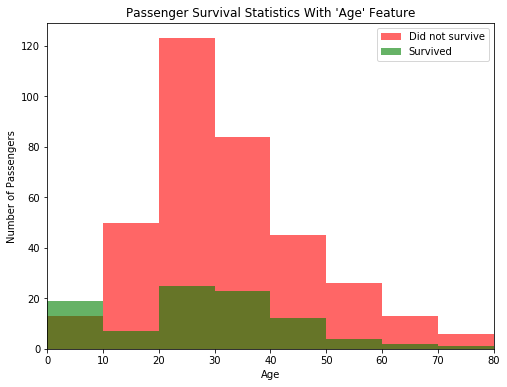

In [11]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

*Examinando as estatísticas de sobrevivência, a maioria dos homens com menos de 10 anos sobreviveu ao naufrágio do navio, enquanto a maioria dos homens de 10 anos ou mais **não sobreviveu** ao naufrágio do navio.*

***Tarefa 3:*** *Vamos continuar a construir a nossa previsão anterior: se um passageiro era do sexo feminino, então vamos prever que eles sobrevivem. Se um passageiro fosse do sexo masculino e tivesse menos de 10 anos, também preveríamos que eles sobreviveriam. Caso contrário, vamos prever que eles não sobrevivem.*

In [12]:
def predictions_2(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        predictions.append(passenger['Sex'] == 'female' or (passenger['Sex'] == 'male' and passenger['Age'] < 10))
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_2(data)

In [13]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 79.35%.


In [14]:
print("The accuracy hat all female passengers and all male passengers younger than 10 survived is 79.35%")

The accuracy hat all female passengers and all male passengers younger than 10 survived is 79.35%


*Adicionando o recurso **Age** como uma condição em conjunto com **Sex** melhora a precisão por uma pequena margem a mais do que simplesmente usando o recurso **Sex** sozinho.*

***Tarefa 4***: *Encontre uma série de recursos e condições para dividir os dados para obter uma precisão de previsão de resultados de pelo menos 80%. Isso pode exigir vários recursos e vários níveis de instruções condicionais para ter sucesso.*

***Pclass***, ***Sex***, ***Age***, ***SibSp***, e ***Parch*** *são boas opções para tentar.*

***Dica:*** *Use multiplos filtros. Exemplo: `["Sex == 'male'", "Age < 18"]`*

In [15]:
female_age_df = data[data['Sex'] == 'female']
female_age_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


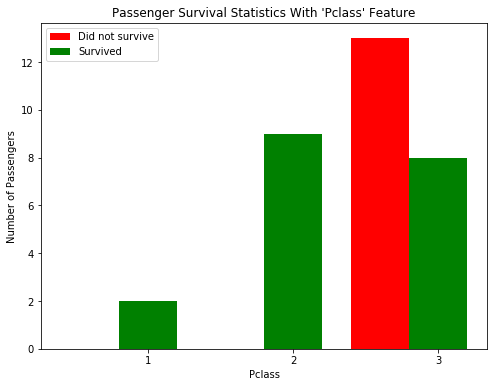

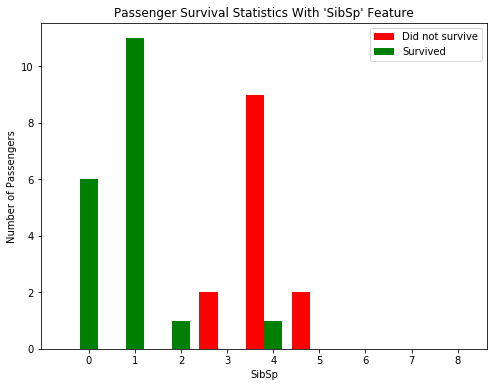

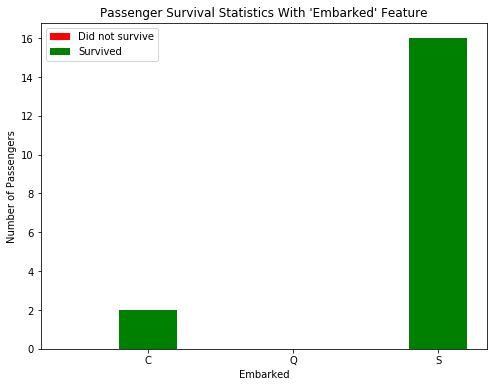

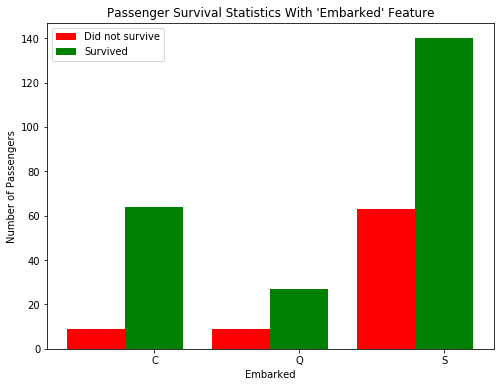

Passengers with missing 'Embarked' values: 2 (2 survived, 0 did not survive)


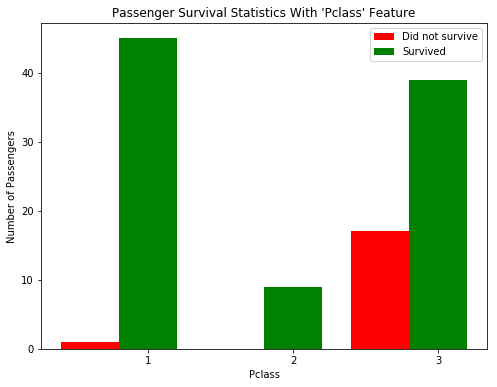

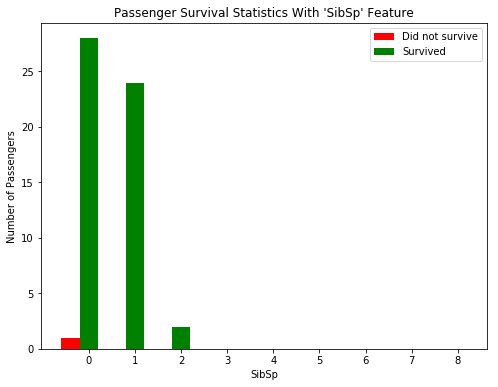

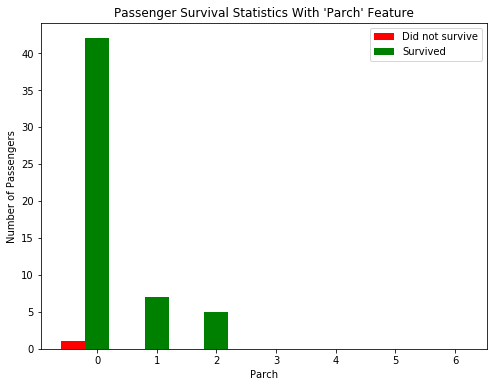

In [16]:
vs.survival_stats(data, outcomes, 'Pclass', ["Sex == 'male'", "Age < 10"])

vs.survival_stats(data, outcomes, 'SibSp', ["Sex == 'male'", "Age < 10", "Pclass < 4"])

vs.survival_stats(data, outcomes, 'Embarked', ["Sex == 'male'", "Age < 10", "Pclass < 4", "SibSp < 3"])

vs.survival_stats(data, outcomes, 'Embarked', ["Sex == 'female'"])

vs.survival_stats(data, outcomes, 'Pclass', ["Sex == 'female'", "Embarked != 'S'"])

vs.survival_stats(data, outcomes, 'SibSp', ["Sex == 'female'", "Embarked != 'S'", "Pclass != 3"])

vs.survival_stats(data, outcomes, 'Parch', ["Sex == 'female'", "Embarked != 'S'", "Pclass != 3"])

In [17]:
def predictions_3(data):
    """ Model with multiple features. Makes a prediction with an accuracy of at least 80%. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        predictions.append((passenger['Sex'] == 'male' 
                                and passenger['Age'] < 10
                                        and passenger['Embarked'] == 'S')
                                           and passenger['SibSp'] < 3 or
                           
                           (passenger['Sex'] == 'female' 
                                and passenger['Parch'] < 4
                                    and not (passenger['Embarked'] == 'S' 
                                        and passenger['Pclass'] == 3)))                    
        
        #80.81%
        #predictions.append(passenger['Sex'] == 'female' 
         #                  and (passenger['SibSp'] < 3)
          #                 and not (passenger['Embarked'] == 'S' 
           #                         and passenger['Pclass'] == 3))
        
        #78.45%
        #predictions.append((passenger['Sex'] == 'female' and passenger['Parch'] < 2)
         #                  or passenger['Sex'] == 'male' and passenger['Age'] < 10)
        
        #81.14%
        #predictions.append(passenger['Sex'] == 'female' 
         #                  and not (passenger['Embarked'] == 'S' 
          #                          and passenger['Pclass'] == 3))
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_3(data)

*Descreva os passos que você tomou para implementar o modelo final de previsão para que ele tenha uma precisão de pelo menos 80%.*

*Quais recursos você viu? Algumas características são mais informativas do que outras? Quais condições você usou para dividir os resultados de sobrevivência nos dados? Quão precisas são as suas previsões?*

In [18]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 83.05%.


***1. Quais recursos você viu?***<br>
*`Age`, `Parch`, `Embarked`, `SibSp` and `Pclass`.*

***2. Algumas características são mais informativas do que outras?***<br>
*Eu não encontrei resultados significativos analisando nenhuma feature isoladamente, então inicialmente combinei os resultados com o `Sexo``.*

***3. Quais condições você usou para dividir os resultados de sobrevivência nos dados?***<br>
*Homens com menos de 10 anos de idade que embarcaram em Southampton e com número de irmãos e cônjuges a bordo inferior a 3. Mulheres com número de pais e filhos a bordo inferior a 4, que não tenham embarcado em Southampton e não sejam de classe socioeconômica baixa.*

***4. Quão precisas são as suas previsões?***<br>
*83.05%.*

**Conclusão**

*Após várias iterações de exploração e condicionamento nos dados, você construiu um algoritmo útil para prever a sobrevivência de cada passageiro a bordo do RMS Titanic. A técnica aplicada neste projeto é uma implementação manual de um modelo simples de aprendizado de máquina, a * árvore de decisão *. Uma árvore de decisão divide um conjunto de dados em grupos menores e menores (chamados * nós *), por um recurso por vez. Cada vez que um subconjunto dos dados é dividido, nossas previsões se tornam mais precisas se cada um dos subgrupos resultantes for mais homogêneo (contém rótulos similares) do que antes.*

*A vantagem de ter um computador faz as coisas para nós é que será mais exaustivo e mais preciso do que a nossa exploração manual acima. [Este link](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/) fornece outra introdução ao aprendizado de máquina usando uma árvore de decisão.*

*Uma árvore de decisão é apenas um dos muitos modelos que vêm da * aprendizagem supervisionada *. Na aprendizagem supervisionada, tentamos usar recursos dos dados para prever ou modelar as coisas com rótulos de resultados objetivos. Ou seja, cada um dos nossos pontos de dados tem um valor de resultado conhecido, como um rótulo discreto e categórico como "Sobrevivido" ou um valor contínuo numérico, como prever o preço de uma casa.*

<a id='projeto_boston'></a>
## Projeto: Estimando Preços dos Imóveis de Boston

*Bem-vindo ao primeiro projeto do Nanodegree de Engenheiro de Machine Learning! Neste Notebook, alguns templates de código estão sendo fornecidos para você, e você irá precisar implementar funcionalidades adicionais para completar este projeto com sucesso. Você não vai precisar modificar o código que foi incluído além do que está sendo pedido. Seções que começam com **'Implementação'** no cabeçalho indicam que o bloco de código seguinte vai exigir que você providencie funcionalidade adicional. Instruções serão fornecidas para cada seção e as especificidades da implementação são marcadas no bloco de código com o comando 'TODO'. Não esqueça de ler as instruções atentamente!*

*Além do código implementado, haverá questões relacionadas com o projeto e sua implementação que você deve responder. Cada seção em que há uma questão para você responder, ela será precedida por **'Questão X'** no cabeçalho. Leia cada questão cuidadosamente e dê respostas completas no seguinte box de texto que contém **'Resposta: '**. O projeto enviado será avaliado com base nas respostas para cada uma das questões e a implementação que você nos forneceu.*

## Começando
Neste projeto, você irá avaliar o desempenho e o poder de estimativa de um modelo que foi treinado e testado em dados coletados dos imóveis dos subúrbios de Boston, Massachusetts. Um modelo preparado para esses dados e visto como *bem ajustado* pode ser então utilizado para certas estimativas sobre um imóvel – em particular, seu valor monetário. Esse modelo seria de grande valor para alguém como um agente mobiliário, que poderia fazer uso dessas informações diariamente.

O conjunto de dados para este projeto se origina do [repositório de Machine Learning da UCI](https://archive.ics.uci.edu/ml/datasets/Housing). Os dados de imóveis de Boston foram coletados em 1978 e cada uma das 489 entradas representa dados agregados sobre 14 atributos para imóveis de vários subúrbios de Boston. Para o propósito deste projeto, os passos de pré-processamento a seguir foram feitos para esse conjunto de dados:
- 16 observações de dados possuem um valor `'MEDV'` de 50.0. Essas observações provavelmente contêm **valores ausentes ou censurados** e foram removidas.
- 1 observação de dados tem um valor `'RM'` de 8.78. Essa observação pode ser considerada **valor atípico (outlier)** e foi removida.
- Os atributos `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` são essenciais. O resto dos **atributos irrelevantes** foram excluídos.
- O atributo `'MEDV'` foi **escalonado multiplicativamente** para considerar 35 anos de inflação de mercado.

** Execute a célula de código abaixo para carregar o conjunto dos dados dos imóveis de Boston, além de algumas bibliotecas de Python necessárias para este projeto. Você vai saber que o conjunto de dados carregou com sucesso se o seu tamanho for reportado. **

In [19]:
# Importar as bibliotecas necessárias para este projeto
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit

# Formatação mais bonita para os notebooks
%matplotlib inline

# Executar o conjunto de dados de imóveis de Boston
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Êxito
print("O conjunto de dados de imóveis de Boston tem {} pontos com {} variáveis em cada.".format(*data.shape))

O conjunto de dados de imóveis de Boston tem 489 pontos com 4 variáveis em cada.


## Explorando os Dados
Na primeira seção deste projeto, você fará uma rápida investigação sobre os dados de imóveis de Boston e fornecerá suas observações. Familiarizar-se com os dados durante o processo de exploração é uma prática fundamental que ajuda você a entender melhor e justificar seus resultados.

Dado que o objetivo principal deste projeto é construir um modelo de trabalho que tem a capacidade de estimar valores dos imóveis, vamos precisar separar os conjuntos de dados em **atributos** e **variável alvo**. O **atributos**, `'RM'`, `'LSTAT'` e `'PTRATIO'`, nos dão informações quantitativas sobre cada ponto de dado. A **variável alvo**, `'MEDV'`, será a variável que procuramos estimar. Eles são armazenados em `features` e ` prices`, respectivamente.

### Implementação: Calcular Estatísticas
Para a sua primeira implementação de código, você vai calcular estatísticas descritivas sobre preços dos imóveis de Boston. Dado que o `numpy` já foi importado para você, use essa biblioteca para executar os cálculos necessários. Essas estatísticas serão extremamente importantes depois para analisar várias estimativas resultantes do modelo construído.

Na célula de código abaixo, você precisará implementar o seguinte:
- Calcular o mínimo, o máximo, a média, a mediana e o desvio padrão do `'MEDV'`, que está armazenado em `prices`.
  - Armazenar cada cálculo em sua respectiva variável.

In [20]:
# TODO: Preço mínimo dos dados
minimum_price = np.amin(prices)

# TODO: Preço máximo dos dados
maximum_price = np.amax(prices)

# TODO: Preço médio dos dados
mean_price = np.mean(prices)

# TODO: Preço mediano dos dados
median_price = np.median(prices)

# TODO: Desvio padrão do preço dos dados
std_price = np.std(prices)

# Mostrar as estatísticas calculadas
print("Estatísticas para os dados dos imóveis de Boston:\n")
print("Preço mínimo: ${:,.2f}".format(minimum_price))
print("Preço máximo: ${:,.2f}".format(maximum_price))
print("Preço médio: ${:,.2f}".format(mean_price))
print("Preço mediano: ${:,.2f}".format(median_price))
print("Desvio padrão dos preços: ${:,.2f}".format(std_price))

Estatísticas para os dados dos imóveis de Boston:

Preço mínimo: $105,000.00
Preço máximo: $1,024,800.00
Preço médio: $454,342.94
Preço mediano: $438,900.00
Desvio padrão dos preços: $165,171.13


### Questão 1 - Observação de Atributos
Para lembrar, estamos utilizando três atributos do conjunto de dados dos imóveis de Boston: `'RM'`, `'LSTAT'` e `'PTRATIO'`. Para cada observação de dados (vizinhança):
- `'RM'` é o número médio de cômodos entre os imóveis na vizinhança.
- `'LSTAT'` é a porcentagem de proprietários na vizinhança considerados de "classe baixa" (proletariado).
- `'PTRATIO'` é a razão de estudantes para professores nas escolas de ensino fundamental e médio na vizinhança.

**Usando a sua intuição, para cada um dos atributos acima, você acha que um aumento no seu valor poderia levar a um _aumento_ no valor do `'MEDV'` ou uma _diminuição_ do valor do `'MEDV'`? Justifique sua opinião para cada uma das opções.**  

**Dica:** Você pode tentar responder pensando em perguntas como:
* Você espera que um imóvel que tem um valor `'RM'` de 6 custe mais ou menos que um imóvel com valor `'RM'` de 7?
* Você espera que um imóvel em um bairro que tem um valor `'LSTAT'` de 15 custe mais ou menos que em um bairro com valor `'LSTAD'` de 20?
* Você espera que um imóvel em um bairro que tem um valor `'PTRATIO'` de 10 custe mais ou menos que em um bairro com `'PTRATIO'` de 15?

In [21]:
features.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


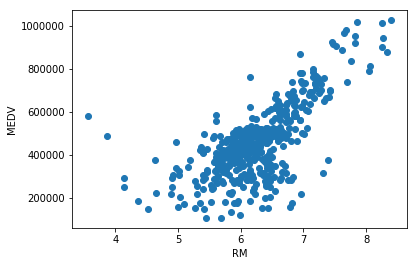

In [22]:
plt.scatter(data['RM'], prices, marker='o');
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.show()

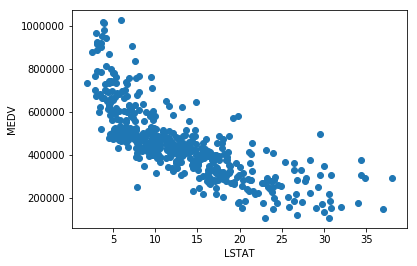

In [23]:
plt.scatter(data['LSTAT'], prices, marker='o');
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()

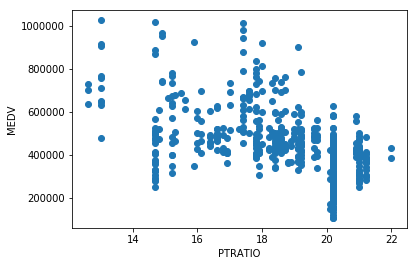

In [24]:
plt.scatter(data['PTRATIO'], prices, marker='o');
plt.xlabel("PTRATIO")
plt.ylabel("MEDV")
plt.show()

**Resposta:**

1. *Aumento no atributo `RM` resulta em um **incremento** do valor de `MEDV`. Acredita-se que o valor do imóvel irá subir quando RM aumentar, pois mais quartos geralmente significa uma área maior, um imóvel maior, e o preço dos imóveis, se for pensar em imóveis similares, aumenta de acordo com a área construída."*
2. *Aumento no atributo `LSTAT` resulta em um **decremento** do valor de `MEDV`. Acredita-se que o valor do imóvel irá baixar quando LSTAT aumentar, pois a região que o imóvel está localizado influencia no valor do imóvel e uma região de classe baixa influenciaria em um preço menor, porque pessoas de classe baixa não conseguiriam adquirir um imóvel caro nesse tipo de região.*
3. *Aumento no atributo `PTRATIO` resulta em um **decremento** do valor de `MEDV`. Acredita-se um grau maior de estudantes para professores indica uma falta de recursos direcionados a educação da região o que poderia influenciar na qualidade de ensino de forma negativa, pois serão muitos alunos para poucos professores darem assistência, ou até professores de baixa qualidade. Logo, o valor do imóvel tende a cair, pois pessoas costumam buscar ambientes em que a qualidade de ensino é satisfatória.*

----

## Desenvolvendo um Modelo
Na segunda seção deste projeto, você vai desenvolver ferramentas e técnicas necessárias para um modelo que faz estimativas. Ser capaz de fazer avaliações precisas do desempenho de cada modelo através do uso dessas ferramentas e técnicas ajuda a reforçar a confiança que você tem em suas estimativas.

### Implementação: Definir uma Métrica de Desempenho
É difícil medir a qualidade de um modelo dado sem quantificar seu desempenho durante o treinamento e teste. Isso é geralmente feito utilizando algum tipo de métrica de desempenho, através do cálculo de algum tipo de erro, qualidade de ajuste, ou qualquer outra medida útil. Para este projeto, você irá calcular o [*coeficiente de determinação*](https://pt.wikipedia.org/wiki/R%C2%B2), R<sup>2</sup>, para quantificar o desempenho do seu modelo. O coeficiente de determinação é uma estatística útil no campo de análise de regressão uma vez que descreve o quão "bom" é a capacidade do modelo em fazer estimativas. 

Os valores para R<sup>2</sup> têm um alcance de 0 a 1, que captura a porcentagem da correlação ao quadrado entre a estimativa e o valor atual da **variável alvo**. Um modelo R<sup>2</sup> de valor 0 sempre falha ao estimar a variável alvo, enquanto que um modelo R<sup>2</sup> de valor 1, estima perfeitamente a variável alvo. Qualquer valor entre 0 e 1 indica qual a porcentagem da variável alvo (ao utilizar o modelo) que pode ser explicada pelos **atributos**. *Um modelo pode dar também um R<sup>2</sup> negativo, que indica que o modelo não é melhor do que aquele que estima ingenuamente a média da variável alvo.*

Para a função ‘performance_metric’ na célula de código abaixo, você irá precisar implementar o seguinte:
- Utilizar o `r2_score` do `sklearn.metrics` para executar um cálculo de desempenho entre `y_true` e `y_predict`.
- Atribuir a pontuação do desempenho para a variável `score`.

In [25]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calcular e retornar a pontuação de desempenho entre 
        valores reais e estimados baseado na métrica escolhida. """
    
    score = r2_score(y_true, y_predict)
    
    return score

### Questão 2 - Qualidade do Ajuste
Admita que um conjunto de dados que contém cinco observações de dados e um modelo fez a seguinte estimativa para a variável alvo:

| Valores Reais | Estimativa |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

** Executar a célula de código abaixo para usar a função `performance_metric’ e calcular o coeficiente de determinação desse modelo. **

In [26]:
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("O coeficiente de determinação, R^2, do modelo é {:.3f}.".format(score))

O coeficiente de determinação, R^2, do modelo é 0.923.


* Você consideraria que esse modelo foi capaz de capturar a variação da variável alvo com sucesso? Por que ou por que não?

** Dica: **
* R2 score com valor 0 significa que a variável dependente não pode ser estimada pela variável independente.
* R2 score com valor 1 significa que a variável dependente pode ser estimada pela variável independente.
* R2 score com valor entre 0 e 1 significa quanto a variável dependente pode ser estimada pela variável independente.
* R2 score com valor 0.40 significa que 40 porcento da variância em Y é estimável por X.

**Resposta:**

*O `score` está **bem próximo** de 1, logo, pode-se dizer que foi capaz de capturar a variação da variável alvo.*



### Implementação: Misturar e Separar os Dados
Sua próxima implementação exige que você pegue o conjunto de dados de imóveis de Boston e divida os dados em subconjuntos de treinamento e de teste. Geralmente os dados são também misturados em uma ordem aleatória ao criar os subconjuntos de treinamento e de teste para remover qualquer viés (ou erro sistemático) na ordenação do conjunto de dados.

Para a célula de código abaixo, você vai precisar implementar o seguinte:
- Utilize `train_test_split` do `sklearn.cross_validation` para misturar e dividir os dados de `features` e `prices` em conjuntos de treinamento e teste. (se estiver com a versão do scikit-learn > 0.18, utilizar o `sklearn.model_selection`. Leia mais [aqui](http://scikit-learn.org/0.19/modules/generated/sklearn.cross_validation.train_test_split.html))
  - Divida os dados em 80% treinamento e 20% teste.
  - Mude o `random_state` do `train_test_split` para um valor de sua escolha. Isso garante resultados consistentes.
- Atribuir a divisão de treinamento e teste para X_train`, `X_test`, `y_train` e `y_test`.

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=1)

# Êxito
print("Separação entre treino e teste feita com êxito.")

Separação entre treino e teste feita com êxito.


### Questão 3 - Treinamento e Teste
* Qual o benefício de separar o conjunto de dados em alguma relação de subconjuntos de treinamento e de teste para um algoritmo de aprendizagem?

**Dica:** O que pode dar errado se não houver uma maneira de testar seu modelo?

**Resposta:** 

*O benefício é identificar se o modelo tem qualidade para qualquer conjunto de dados. A utilização de um conjunto de dados único ocasionaria em superestimar a performance do modelo, além de falhar na identificação se o modelo está "decorando" os dados ou não aprendendo com eles. A separação do conjunto faria com que o modelo treinasse com um conjunto diferente do que seria rodado no teste, e apenas no final, utilizar o conjunto de teste para garantir uma melhor avaliacão do modelo.*

----

## Analisando o Modelo de Desempenho
Na terceira parte deste projeto, você verá o desempenho em aprendizagem e teste de vários modelos em diversos subconjuntos de dados de treinamento. Além disso, você irá investigar um algoritmo em particular com um parâmetro `'max_depth'` (profundidade máxima) crescente, em todo o conjunto de treinamento, para observar como a complexidade do modelo afeta o desempenho. Plotar o desempenho do seu modelo baseado em critérios diversos pode ser benéfico no processo de análise, por exemplo: para visualizar algum comportamento que pode não ter sido aparente nos resultados sozinhos.

### Curvas de Aprendizagem
A célula de código seguinte produz quatro gráficos para um modelo de árvore de decisão com diferentes níveis de profundidade máxima. Cada gráfico visualiza a curva de aprendizagem do modelo para ambos treinamento e teste, assim que o tamanho do conjunto treinamento aumenta. Note que a região sombreada da curva de aprendizagem denota a incerteza daquela curva (medida como o desvio padrão). O modelo é pontuado em ambos os conjuntos treinamento e teste utilizando R<sup>2</sup>, o coeficiente de determinação.  

**Execute a célula de código abaixo e utilizar esses gráficos para responder as questões a seguir.**

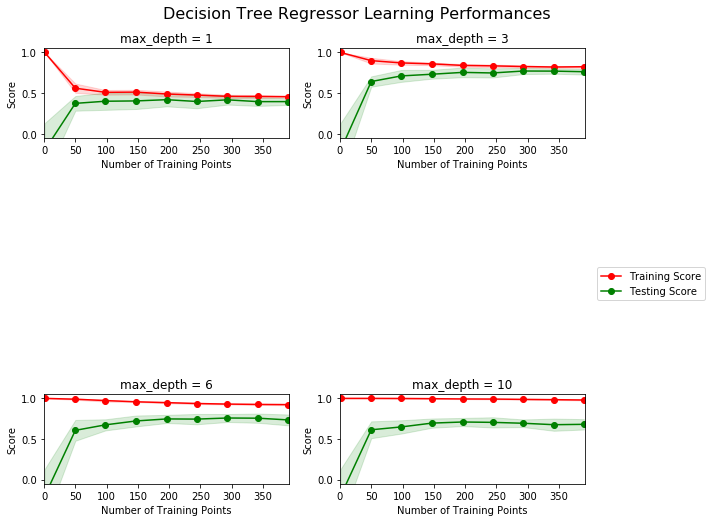

In [28]:
# Criar curvas de aprendizagem para tamanhos de conjunto de treinamento variável e profundidades máximas
vs.ModelLearning(features, prices)

### Questão 4 - Compreendendo os Dados
* Escolha qualquer um dos gráficos acima e mencione a profundidade máxima escolhida.
* O que acontece com a pontuação da curva de treinamento se mais pontos de treinamento são adicionados? E o que acontece com a curva de teste?
* Ter mais pontos de treinamento beneficia o modelo?

**Dica:** As curvas de aprendizagem convergem para uma pontuação em particular? Geralmente, quanto mais dados você tem, melhor. Mas, se sua curva de treinamento e teste estão convergindo com um desempenho abaixo do benchmark, o que seria necessário? Pense sobre os prós e contras de adicionar mais pontos de treinamento baseado na convergência das curvas de treinamento e teste.

**Resposta:**

*Considerando ``max_depth = 1`` que as curvas de treino e teste se encontram bem abaixo no `score` e que possuem grande proximidade uma da outra, acredita-se que o modelo está experimentando um viés alto e variância baixa. Neste caso, considera-se também que um incremento de número de `training points` não faria diferença, pois o modelo não está adequado e adicionar mais pontos não faria com que o modelo aprendesse os dados.*

### Curvas de Complexidade
A célula de código a seguir produz um gráfico para um modelo de árvore de decisão que foi treinada e validada nos dados de treinamento utilizando profundidades máximas diferentes. O gráfico produz duas curvas de complexidade – uma para o treinamento e uma para a validação. Como a **curva de aprendizagem**, a área sombreada de ambas as curvas de complexidade denota uma incerteza nessas curvas, e o modelo pontuou em ambos os conjuntos de treinamento e validação utilizando a função `performance_metric`.  

** Execute a célula de código abaixo e utilize o gráfico para responder as duas questões a seguir. **

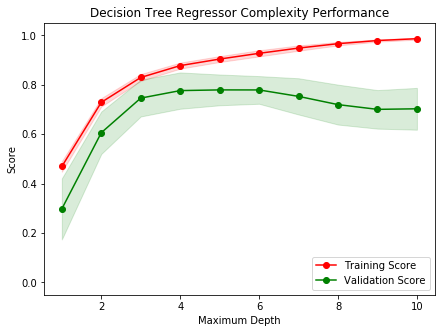

In [29]:
vs.ModelComplexity(X_train, y_train)

### Questão 5 - Equilíbrio entre viés e variância
* Quando o modelo é treinado com o profundidade máxima 1, será que o modelo sofre mais de viés (erro sistemático) ou variância (erro aleatório)?
* E o que acontece quando o modelo é treinado com profundidade máxima 10?
* Quais pistas visuais existem no gráfico para justificar suas conclusões?

**Dica:** Como você sabe que um modelo está experimentando viés alto ou variância alta? Viés alto é um sinal de *underfitting* (o modelo não é complexo o suficiente para aprender os dados) e alta variância é um sinal de *overfitting* (o modelo está "decorando" os dados e não consegue generalizar bem o problema). Pense em modelos (com profundidade de 1 e 10, por exemplo) e qual deles está alinhado com qual parte do equilíbrio.

**Resposta:**

*Considerando `max_depth` = 1 o resultado do treino e o teste são baixos, caracterizando o underfitting. E para `max_depth` = 10 o resultado do treino é alto e a validação é baixa, caracterizando o overfitting.*

### Questão 6 - Modelo Ótimo de Melhor Suposição
* Qual profundidade máxima (`'max_depth'`) você acredita que resulta em um modelo que melhor generaliza um dado desconhecido?
* Que intuição te levou a essa resposta?

**Dica: ** Olhe no gráfico acima e veja o desempenho de validação para várias profundidades atribuidas ao modelo. Ele melhora conforme a profundidade fica maior? Em qual ponto nós temos nosso melhor desempenho de validação sem supercomplicar nosso modelo? E lembre-se, de acordo com a [Navalha de Occam](https://pt.wikipedia.org/wiki/Navalha_de_Occam), sempre devemos optar pelo mais simples ao complexo se ele conseguir definir bem o problema.

**Resposta:**

*Baseado no gráfico acima, acredita-se que a profundida máxima seria 4, pois a pontuação de validação é alta em relaçao aos outros pontos que aumentam profundidade. Também podemos considerar que existe pouca diferença nas curvas de treino e validação.*

-----

## Avaliando o Desempenho do Modelo
Nesta parte final do projeto, você irá construir um modelo e fazer uma estimativa de acordo com o conjunto de atributos do cliente utilizando um modelo otimizado a partir de `fit_model`.

### Questão 7 - Busca em Matriz
* O que é a técnica de busca em matriz (*grid search*)?
* Como ela pode ser aplicada para otimizar um algoritmo de aprendizagem?

** Dica: ** Quando explicar a técnica de busca em matriz, tenha certeza que você explicou o motivo dela ser usada, o que a 'matriz' significa nesse caso e qual o objetivo da técnica. Para ter uma resposta mais sólida, você pode também dar exemplo de um parâmetro em um modelo que pode ser otimizado usando essa técnica.

**Resposta:**



*Existem algoritmos de Machine Learning (por exemplo, K-Means ou Árvores de Decisão) que possuem parâmetros alteráveis que controlam o próprio processo de treino (hiperparâmetros). Considerando o K-Means como exemplo, um número de cluster fora do ideal ocasionaria numa má execução da clusterização. Para resolver esse tipo de problema, pode-se utilizar Grid Search. O objetivo principal consiste em fazer uma matriz para combinar parâmetros do modelo, treinar cada e avaliar usando validação cruzada, afim de encontrar a combinação que retorne a melhor pontuação para o modelo.*

### Questão 8 - Validação Cruzada
* O que é a técnica de treinamento de validação-cruzada k-fold?
* Quais benefícios essa técnica proporciona para busca em matriz ao otimizar um modelo?

**Dica:** Lembre-se de expllicar o que significa o 'k' da validação-cruzada k-fold, como a base de dados é dividida e quantas vezes ela é executada.

Assim como há um raciocínio por trás de utilizar um conjunto de teste, o que poderia dar errado ao utilizar busca em matriz sem um conjunto de validação cruzada? Você pode utilizar a [documentação](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) para basear sua resposta.

**Resposta:**
*Ao invés de ter apenas um conjunto de treino e teste, também teremos um conjunto de `cross validation`. O principal objetivo dessa técnica é a reciclagem dos dados, pois alguns dados relevantes para treino podem ser jogados fora do conjunto de treino. Para solucionar esse problema, quebra-se os dados em `k` pedaços. Treina-se o modelo `k` vezes, cada vez utilizando um pedaço de diferente como conjunto de teste e o resto dos pontos como conjunto de treino. E então tiramos a média dos resultados para ter o modelo final.*

### Implementação: Ajustar um Modelo
Na sua última implementação, você vai precisar unir tudo o que foi aprendido e treinar um modelo utilizando o **algoritmo de árvore de decisão**. Para garantir que você está produzindo um modelo otimizado, você treinará o modelo utilizando busca em matriz para otimizar o parâmetro de profundidade máxima (`'max_depth'`) para uma árvore de decisão. Esse parâmetro pode ser entendido como o número de perguntas que o algoritmo de árvore de decisão pode fazer sobre os dados antes de fazer uma estimativa. Árvores de decisão são parte de uma classe de algoritmos chamados *algoritmos de aprendizagem supervisionada*.

Além disso, você verá que a implementação está usando o `ShuffleSplit()` como alternativa para a validação cruzada (veja a variável `cv_sets`). Ela não é a técnica que você descreveu na **Questão 8**, mas ela é tão útil quanto. O `ShuffleSplit()` abaixo irá criar 10 (`n_splits`) conjuntos misturados e 20% (`test_size`) dos dados serão utilizados para validação. Enquanto estiver trabalhando na sua implementação, pense nas diferenças e semelhanças com a validação k-fold.

** Fique atento que o `ShuffleSplit` tem diferentes parâmetros nas versões 0.17 e 0.18/0.19 do scikit-learn.**
* [Versão 0.17](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.ShuffleSplit.html#sklearn.cross_validation.ShuffleSplit) - `ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, indices=None, random_state=None, n_iterations=None)`
* [Versão 0.18](http://scikit-learn.org/0.18/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit) - `ShuffleSplit(n_splits=10, test_size=’default’, train_size=None, random_state=None)`

Para a função `fit_model` na célula de código abaixo, você vai precisar implementar o seguinte:
- Utilize o [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) do `sklearn.tree` para gerar um objeto regressor de árvore de decisão.
  - Atribua esse objeto à variável `'regressor'`.
- Gere um dicionário para `'max_depth'` com os valores de 1 a 10 e atribua isso para a variável `'params'`.
- Utilize o [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) do `sklearn.metrics` para gerar um objeto de função de pontuação.
  - Passe a função `performance_metric` como um parâmetro para esse objeto.
  - Atribua a função de pontuação à variável `'scoring_fnc'`.
- Utilize o [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) do `sklearn.grid_search` para gerar um objeto de busca por matriz.
  - Passe as variáveis `'regressor'`, `'params'`, `'scoring_fnc'` and `'cv_sets'` como parâmetros para o objeto. 
  - Atribua o objeto `GridSearchCV` para a variável `'grid'`.

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Desempenhar busca em matriz sobre o parâmetro the 'max_depth' para uma 
        árvore de decisão de regressão treinada nos dados de entrada [X, y]. """
    
    # Gerar conjuntos de validação-cruzada para o treinamento de dados 
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    regressor = DecisionTreeRegressor()

    params = {'max_depth': np.arange(1, 11)}

    scoring_fnc = make_scorer(performance_metric)

    grid = GridSearchCV(regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Ajustar o objeto de busca em matriz com os dados para calcular o modelo ótimo
    grid = grid.fit(X, y)

    # Devolver o modelo ótimo depois de realizar o ajuste dos dados
    return grid.best_estimator_

### Fazendo Estimativas
Uma vez que o modelo foi treinado em conjunto de dados atribuído, ele agora pode ser utilizado para fazer estimativas em novos conjuntos de entrada de dados. No caso do *regressor da árvore de decisão*, o modelo aprendeu *quais são as melhores perguntas sobre a entrada de dados*, e pode responder com uma estimativa para a **variável alvo**. Você pode utilizar essas estimativas para conseguir informações sobre os dados dos quais o valor da variável alvo é desconhecida – por exemplo, os dados dos quais o modelo não foi treinado.

### Questão 9 - Modelo Ótimo
* Qual profundidade máxima do modelo ótimo? Como esse resultado se compara com a sua suposição na **Questão 6**?  

** Executar a célula de código abaixo para ajustar o regressor da árvore de decisão com os dados de treinamento e gerar um modelo ótimo. **

In [31]:
# Ajustar os dados de treinamento para o modelo utilizando busca em matriz
reg = fit_model(X_train, y_train)

# Produzir valores para 'max_depth'
print("O parâmetro 'max_depth' é {} para o modelo ótimo.".format(reg.get_params()['max_depth']))

O parâmetro 'max_depth' é 5 para o modelo ótimo.


**Dica: ** A resposta vem da saída do código acima.

**Resposta:**

*Na questão 6 eu havia identificado que um intervalo entre 4 e 6 seria satisfatório.*

### Questão 10 - Estimando Preços de Venda
Imagine que você era um corretor imobiliário na região de Boston ansioso para utilizar esse modelo que ajuda os imóveis que seus clientes desejam vender. Você coletou as seguintes informações de três dos seus clientes:

| Atributos | Cliente 1 | Cliente 2 | Cliente 3 |
| :---: | :---: | :---: | :---: |
| Número total de cômodos em um imóvel | 5 cômodos | 4 cômodos | 8 cômodos |
| Nível de pobreza da vizinhança (em %) | 17% | 32% | 3% |
| Razão estudante:professor das escolas próximas | 15-to-1 | 22-to-1 | 12-to-1 |\

*Qual valor você sugeriria para cada um dos seus clientes para a venda de suas casas?*
*Esses preços parecem razoáveis dados os valores para cada atributo?* 

**Dica:** Utilize as estatísticas que você calculou na seção **Explorando Dados** para ajudar a justificar sua resposta. Dos três clientes, o Cliente 3 tem a maior casa, no melhor bairro de escolas públicas e menor inídice de pobreza; Cliente 2 tem a menor casa, em um bairro com índice de pobreza relativamente alto e sem as melhores escolas públicas.

** Execute a célula de códigos abaixo para que seu modelo otimizado faça estimativas para o imóvel de cada um dos clientes.**

In [32]:
# Gerar uma matriz para os dados do cliente
client_data = [[5, 17, 15], # Cliente 1
               [4, 32, 22], # Cliente 2
               [8, 3, 12]]  # Cliente 3

# Mostrar estimativas
for i, price in enumerate(reg.predict(client_data)):
    print("Preço estimado para a casa do cliente {}: ${:,.2f}".format(i+1, price))

Preço estimado para a casa do cliente 1: $419,700.00
Preço estimado para a casa do cliente 2: $287,100.00
Preço estimado para a casa do cliente 3: $927,500.00


**Resposta:**

*Considerando as features utilizadas no modelo, acredita-se que faz sentido os valores sugeridos, principalmente ao considerar a exploração de dados anterior em que analisamos que casas com vários cômodos, localizadas em regiões com menor incidência de população de classe baixa e menor quantidade de estudantes por professores possuiriam preços elevados, como é o caso do `Cliente 3`. Para o `Cliente 1` o preço resultante foi moderado e se enquadra na média, pois se encontra em uma região com valores moderados de classe baixa e estudantes por professores. E o `Cliente 2` teve seu preço bastante desvalorizado pelo índice de população de classe baixa ser elevado e por um número significativo de estudantes por professores.*

### Sensibilidade
Um modelo ótimo não é necessariamente um modelo robusto. Às vezes, um modelo é muito complexo ou muito simples para generalizar os novos dados. Às vezes, o modelo pode utilizar um algoritmo de aprendizagem que não é apropriado para a estrutura de dados especificado. Outras vezes, os próprios dados podem ter informação excessiva ou exemplos insuficientes para permitir que o modelo apreenda a variável alvo – ou seja, o modelo não pode ser ajustado.

** Execute a célula de código abaixo para rodar a função `fit_model` dez vezes com diferentes conjuntos de treinamento e teste para ver como as estimativas para um cliente específico mudam se os dados foram treinados.**

In [33]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Questão 11 - Aplicabilidade
* Em poucas linhas, argumente se o modelo construído deve ou não ser utilizado de acordo com as configurações do mundo real.

**Dica:** Olhe os valores calculados acima. Algumas questões para responder:
* Quão relevante dados coletados em 1978 podem ser nos dias de hoje? A inflação é importante?
* Os atributos presentes são suficientes para descrever um imóvel?
* Esse modelo é robusto o suficiente para fazer estimativas consistentes?
* Dados coletados em uma cidade urbana como Boston podem ser aplicados para uma cidade rural?
* É justo julgar o preço de um único imóvel baseado nas características de todo o bairro?

**Resposta:**

*Acredita-se que esse modelo não é ideal para os dias de hoje. A inflação influencia drasticamente no valor dos imóveis. Os atributos presentes influenciam, mas outros fatores deveriam ser considerados, por exemplo, a segurança da localização do imóvel, os recursos disponíveis na área, etc. Para esse estudo o modelo é robusto, mas não atualmente. Não faria sentido aplicar em uma cidade rural. O ambiente e as necessidades são totalmente diferentes de uma cidade urbana. É justo julgar pelas características do bairro se forem combinados com os dados do imóvel. Isoladamente, não faz sentido apenas avaliar o bairro.*